#### import libs

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

#### list files

In [24]:
from os import listdir
from os.path import isfile, join

# create path to input
mypath = "../DataSets/Mercedes"

# get all files
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# remove readme
list(filter(lambda a: a != 'README', onlyfiles))

# create paths
testPath = mypath + "/test.csv"
trainPath = mypath + "/train.csv"

#### load data

In [25]:
train_df = pd.read_csv(trainPath)
test_df = pd.read_csv(testPath)

##### check out train csv

In [7]:
train_df.shape

(4209, 378)

In [5]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

#### check out the target value

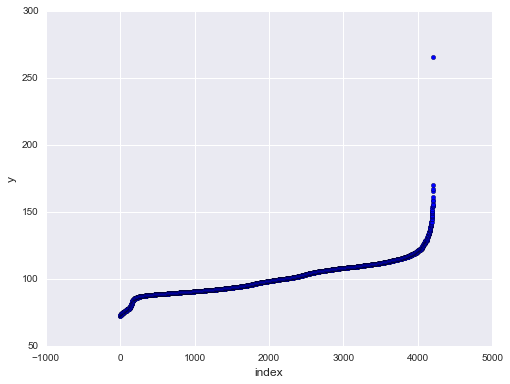

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

#### remove outliers (or maybe dont?!)

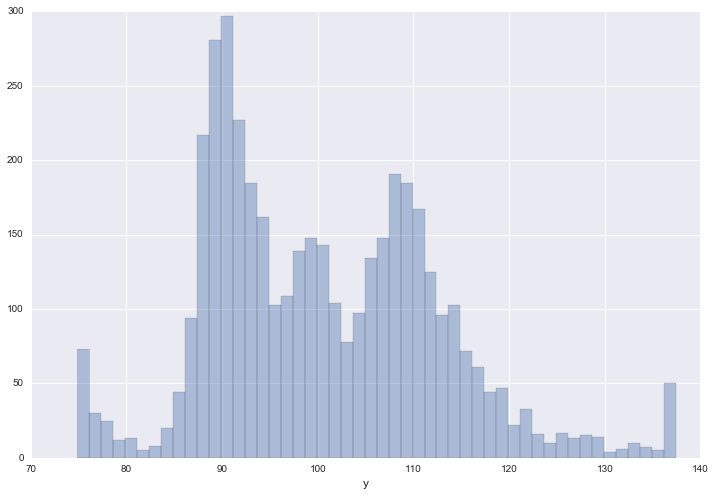

In [7]:
ulimit = np.percentile(train_df.y.values, 99)
llimit = np.percentile(train_df.y.values, 1)
train_df['y'].ix[train_df['y']>ulimit] = ulimit
train_df['y'].ix[train_df['y']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.y.values, bins=50, kde=False)
plt.xlabel('y', fontsize=12)
plt.show()

#### are there any NaNs?

In [8]:
nan_df = train_df.isnull().sum(axis=0).reset_index()
nan_df.columns = ['Feature', 'NaNs']
nan_df.ix[nan_df['NaNs']>0]

,Feature,NaNs


### transform categorical data to dummy variables
#### take test data as well and stack them before getting the dummies out

In [26]:
# remember size of train_df
train_shape = train_df.shape
# concat train and test
main_df = pd.concat([train_df, test_df])
# get dummies
main_df = pd.get_dummies(main_df, drop_first=True)
# split the stuff again
train_df, test_df = main_df[:train_shape[0]], main_df[train_shape[0]:]

#### drop unimportant columns

In [27]:
train_df = train_df.drop('ID', axis=1)

#### define input variables

In [28]:
y = train_df['y']

In [29]:
X = train_df.drop('y', axis=1)

#### split in training and cv set

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=0)

#### setup ml model

In [13]:
from sklearn.neural_network import MLPRegressor
meepo = MLPRegressor(\
                     hidden_layer_sizes=((train_df.shape[1]*2), (train_df.shape[1]*2)),\
                     activation='tanh',\
                     max_iter=10000,\
                     verbose=True,\
                     learning_rate_init=0.0001\
                    )

In [14]:
meepo.fit(X_train, y_train)

Iteration 1, loss = 4314.69013368
Iteration 2, loss = 2669.33568795
Iteration 3, loss = 1772.65408897
Iteration 4, loss = 1471.96115070
Iteration 5, loss = 1315.16837097
Iteration 6, loss = 1195.48421955
Iteration 7, loss = 1091.97246432
Iteration 8, loss = 999.50889612
Iteration 9, loss = 915.56106669
Iteration 10, loss = 838.71171464
Iteration 11, loss = 768.39194280
Iteration 12, loss = 703.81557941
Iteration 13, loss = 644.56509090
Iteration 14, loss = 589.90901182
Iteration 15, loss = 539.95066633
Iteration 16, loss = 493.93785916
Iteration 17, loss = 451.98190009
Iteration 18, loss = 413.46765856
Iteration 19, loss = 378.24865891
Iteration 20, loss = 346.32094741
Iteration 21, loss = 317.20908940
Iteration 22, loss = 290.63445195
Iteration 23, loss = 266.73449680
Iteration 24, loss = 245.13527212
Iteration 25, loss = 225.50247642
Iteration 26, loss = 207.98164056
Iteration 27, loss = 192.18299411
Iteration 28, loss = 178.02394686
Iteration 29, loss = 165.44507018
Iteration 30, lo

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1144, 1144), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

### work the test data

In [34]:
test_id = test_df.ix[:, ['ID']]

In [40]:
test_df = test_df.drop(['y', 'ID'], axis=1)

#### predict stuff

In [41]:
y_pred = meepo.predict(test_df)

#### merge stuff and pack everything into output.

In [53]:
y_pred = pd.Series(y_pred)
result = pd.concat([test_id, y_pred], axis=1, ignore_index=True)
result.columns = ['ID', 'y']

In [65]:
result

,ID,y
0,1,84.588265
1,2,100.555837
2,3,88.350685
3,4,76.434269
4,5,112.033277
5,8,93.251188
6,10,108.559970
7,11,91.291748
8,12,117.166945
9,14,93.911575


#### store result as csv

In [66]:
result.to_csv('results.csv', index=False)